## Solution to Exercise 1 
### Exploratory Data Analysis on Haberman Dataset from Kaggle
###                             By Nileshchandra Pikle

In [4]:
import numpy as np # to import numerical python library for array based computations
import pandas as pd # To work on data frames or table
import matplotlib.pyplot as plt # To plot the data for visualization purpose
import seaborn as sbn # To use some advanced plotting tools

hb = pd.read_csv('haberman.csv')
hb.columns = ["Operation Age", "Year of Operation", "# affected nodes", "Survival Status"]
print(hb.shape)
print(hb.head())
print(hb.columns)
hb['Survival Status'].value_counts()


(306, 4)
   Operation Age  Year of Operation  # affected nodes  Survival Status
0             30                 64                 1                1
1             30                 62                 3                1
2             30                 65                 0                1
3             31                 59                 2                1
4             31                 65                 4                1
Index(['Operation Age', 'Year of Operation', '# affected nodes',
       'Survival Status'],
      dtype='object')


1    225
2     81
Name: Survival Status, dtype: int64

# Observation 1
1. Here Pandas library / package is used to read csv file named as haberman.csv
2. This file contains data related to the patient survival who are suffering from cancer
3. The data set contains 306 patients data w.r.t 4 parameters age, year, nodes and status
4. The final column 'status' has two types of values:  1 indicates "Patient survived for 5 years after surgery" and 
   2 indicates "patient died within 5 years of surgery"
5. There are total 225 patients survived after surgery and 81 patients are died after surgery

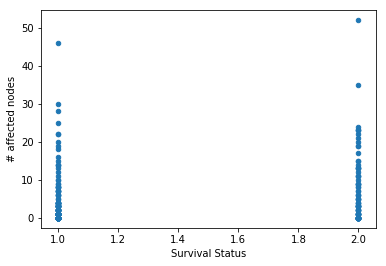

In [7]:
hb.plot(kind = 'scatter', x = 'Survival Status', y = '# affected nodes')
plt.show()


In [8]:
hb.tail()
hb.describe()

,Operation Age,Year of Operation,# affected nodes,Survival Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [3]:
hb["Survival Status"].value_counts()

1    225
2     81
Name: Survival Status, dtype: int64

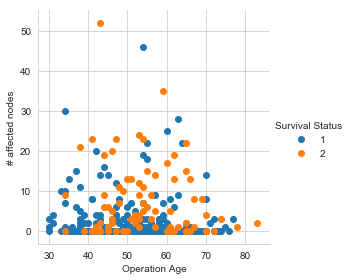

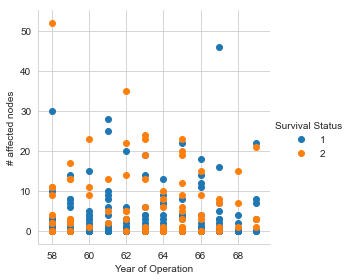

In [41]:
import warnings
warnings.filterwarnings("ignore")
sbn.set_style("whitegrid");
sbn.FacetGrid(hb, hue = "Survival Status",size = 4.0).map(plt.scatter,"Operation Age","# affected nodes").add_legend();
sbn.FacetGrid(hb, hue = "Survival Status",size = 4.0).map(plt.scatter,"Year of Operation","# affected nodes").add_legend();

plt.show()

# Observation 2
1. Offcourse by using above scatter plot we cannot make any concrete conclusion about the survival of the patient
2. In first scatter plot, affected nodes and operation age is considered. However, we cannot make any conclusion about the survival rate as both status are mixed. We cannot draw a line to separate the two survival status 1 and 2
3. Similarly, second plot indicates the relation between # affecte dnodes and Year of operation. However, again we cannot draw a line to separate these two values of survival rates

# Univariate analysis - PDF

[]

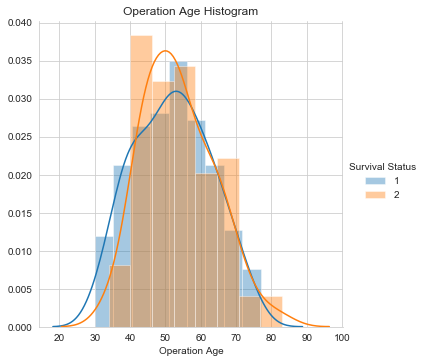

In [40]:
import warnings
warnings.filterwarnings("ignore")
sbn.set_style("whitegrid")
sbn.FacetGrid(hb, hue = "Survival Status", size = 5.0).map(sbn.distplot, "Operation Age").add_legend()
plt.title("Operation Age Histogram")
plt.plot()

## Observation 1
1. Above figure shows histogram plot of "Survival Status" based on Operation Age (Age of patient at the time of operation).
   As one can observe here X-axis indicates the Operation age having intervals. Probability of survival in each interval is                         
   indicated by Y-axix
2. Both PDFs for Survival Status 1 and Survival Status 2 are overlapping and hence we cannot conclude anything from above PDFs

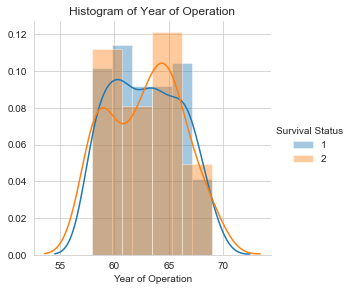

In [39]:
import warnings
warnings.filterwarnings("ignore")
sbn.set_style("whitegrid")
sbn.FacetGrid(hb, hue = "Survival Status", size = 4.0).map(sbn.distplot, "Year of Operation").add_legend();
plt.title("Histogram of Year of Operation")
plt.show()

## Observation 2
1. Above figure indicates the histogram or PDF of Survial Status of patient based on the Year of the Operation performed
2. X-axis indicates the intervals of year and Y-axis indicates the frequency (normalized) of patient's Survival Status
3. Again from this PDF/Histogram we cannot make a concrete conclusion about relation between patient survival status and year of the operation perfomed as both PDFs are overlapping

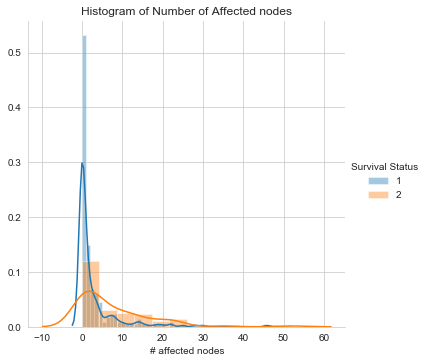

In [38]:
import warnings
warnings.filterwarnings("ignore")
sbn.set_style("whitegrid")
sbn.FacetGrid(hb, hue = "Survival Status", size = 5.0).map(sbn.distplot, "# affected nodes").add_legend();
plt.title("Histogram of Number of Affected nodes")
plt.show()

## Observation 3
1. The above plot depicts the histogram of Survival Status of patients based on the number of affected lymph nodes
2. Albeit both histograms are overlapping slightly we can make an obvious conclusion that the survival rate is more (~52%) if the number of affected nodes are in the range of 0 to 3. However, we cannot discard the fact that in this range a small percentage (~11%) of patients died as well. 
3. This is observed due to both PDFs are overlapping. Based on this PDFs one may predict that 
4. if(# affected nodes > 3)
5. {
6.     Survival Status = 2
7.   }else{
8.      Survival Status = 1
9.        }

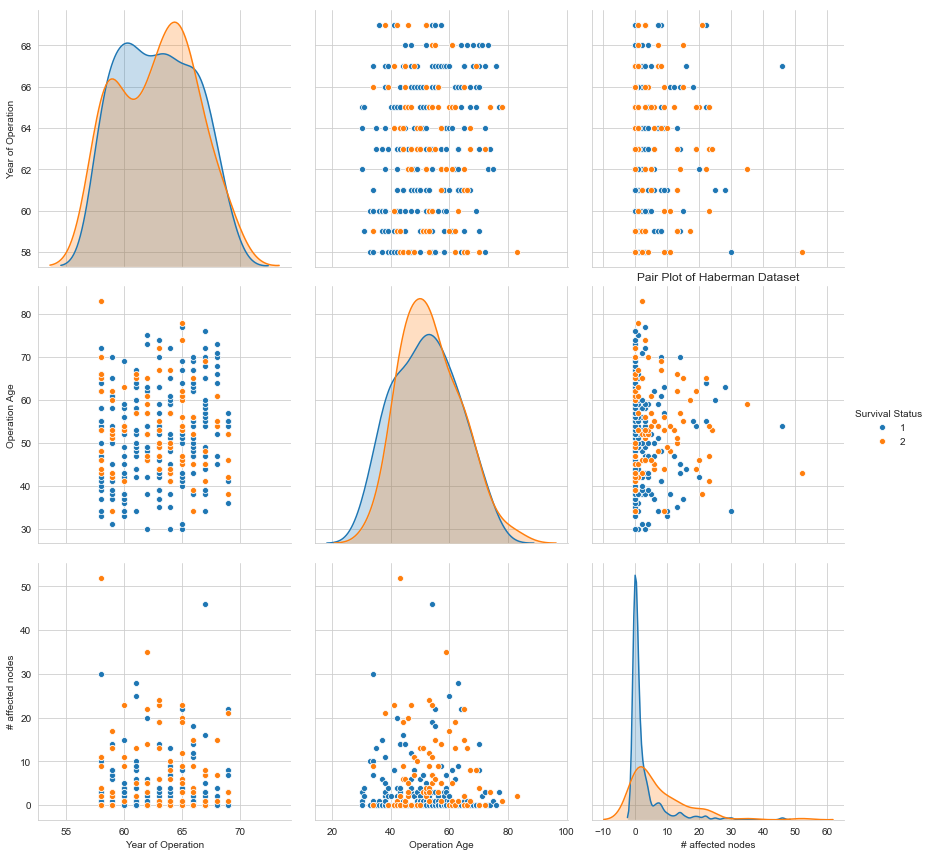

In [37]:
import warnings
warnings.filterwarnings("ignore")
sbn.set_style("whitegrid")
sbn.pairplot(hb, hue="Survival Status", vars=['Year of Operation', 'Operation Age', "# affected nodes"], size=4);
plt.title("Pair Plot of Haberman Dataset");
plt.show();



# Observations in  Pair plot
1. First of all, pair plot is used to perform scatter plot on the number of features (N) in the dataset. Pairplot plots scatter plot of all possible combinations of features i.e. NC2 combinations
2. Furthermore, Diagonal plots indicates the PDFs w.r.t. all features to indicate the survival status. As discussed in previous observation only PDF of Number of affected nodes concludes some information. Rest of the PDFs are totally overlapped hence we can't make any conclusion here

# Cumulative Distribution Function (CDF) 

[0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


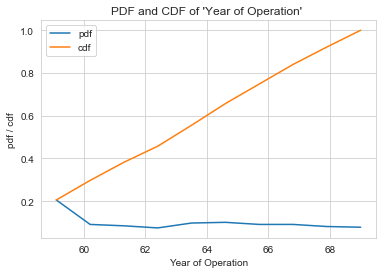

In [24]:
yof = np.array(hb["Year of Operation"])
counts, bin_edges = np.histogram(yof,bins = 10, density = True)
pdf = counts/sum(counts)
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label = "pdf")
plt.plot(bin_edges[1:],cdf, label = "cdf")
plt.legend()
plt.xlabel("Year of Operation")
plt.ylabel("pdf / cdf")
plt.title("PDF and CDF of 'Year of Operation' ")

plt.show()

## Observation
### Note: For some features plotting PDF and CDF may not required but I plotted  it just for practice :-)
1. Above figure depicts the PDF and CDF on year of operation. PDF is based on histogram, hence I have computed the histogram on feature "Year of Operation" 
2. First, using numpy package the feature Year of Operation column from data frame hb is stored into yof array
3. Using histogram module of numpy two parameters are computed one is bin edges i.e. bin range points and second number of items in each bin. These two parameters form histogram. To calculate PDF divide the counts array by sum of counts. In other words if we normalize histogram we get PDF
4. If we perform prefix sum on PDF array we get CDF. This can be done using numpy function np.cumsum
5. Using CDF we can find out number of operations performed till particular date
   Eg. 60% operations are performed on and before year 1964
6. PDF only shown percentage of operations performed in particular year whereas CDF indicates totoal percentage of operations performed on and before particular date 

[0.14831574 0.0188537  0.01131222 0.00502765 0.00565611 0.00125691
 0.00062846 0.         0.00062846 0.00062846]
[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]


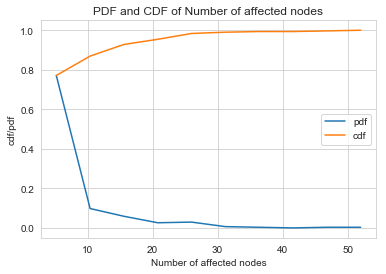

In [51]:
non = np.array(hb["# affected nodes"])
counts, bin_edges = np.histogram(non, bins = 10, density = True)
pdf = counts/sum(counts)
print(counts)
print(pdf)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf, label = "pdf")
plt.plot(bin_edges[1:],cdf, label = "cdf")
plt.title("PDF and CDF of Number of affected nodes")

plt.xlabel("Number of affected nodes")
plt.ylabel("cdf/pdf")
plt.legend()
plt.show()

## Observations
1. This plot shows the PDF and CDF on "Number of affected nodes" feature.
2. PDF shows percentage of patients having x number of affected nodes where x indicates the bins or range of numbers
3. As one can notice from PDF that, most of the patients are with 3 to 10 affected lymph nodes. As the number of affected nodes increases the percentage of people get reduced. 
4. This can be observed in case of CDF also as it is becoming constant for number nodes in range 20 to 50. 
5. PDF - Almost 70% patients have 3 affected lymph nodes, 10% people have 10 affected lymph nodes, 0% patiets have 35-50 affected lymph nodes.
6. CDF- almost 95% patients are with 20 or less affected lymph nodes

[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[0.05228758 0.14052288 0.29084967 0.46405229 0.64379085 0.77777778
 0.91176471 0.97058824 0.99346405 1.        ]


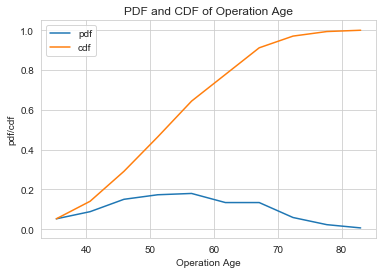

In [50]:
oa = np.array(hb["Operation Age"])
counts, bin_edges = np.histogram(oa, bins = 10, density = True)

pdf = counts/sum(counts)
print(pdf)
cdf = np.cumsum(pdf)
print(cdf)

plt.plot(bin_edges[1:], pdf, label = "pdf")
plt.plot(bin_edges[1:],cdf, label = "cdf")
plt.title("PDF and CDF of Operation Age")
plt.xlabel("Operation Age")
plt.ylabel("pdf/cdf")
plt.legend()
plt.show()




## Observations
1. The above figure depicts the PDF and CDF on feature Operation Age of the Haberman dataset of cancer patients 
2. PDF indicates percentage of people had surgry at specific age
   eg. Approximatey 18% of patients had surgery at the age of 50, ~10% patients gone through surgery at theage of 70, etc.
3. CDF indicates total number of patients gone through the surgery on and before specific age
   Eg. ~60% percentage of patients had surgery on and before age 55, ~20% patients had surgery on and before 42

# Observations:  Mean, Variance and STD

In [9]:
array = np.array(hb["Operation Age"])
meanofOperationAge = np.mean(array)
print("Mean of Operation Age: ",meanofOperationAge)
stdofOperationAge = np.std(array)
print("Standard deviation of Operation Age: ",stdofOperationAge)

Mean of Operation Age:  52.45751633986928
Standard deviation of Operation Age:  10.785785203631832


### Observations for mean and STD on "Operation Age"
1. "meanofOperationAge" indicates the average age of the patients at the time of operation and is 52.45
2. Standard deviation of "Operation Age" indicates on an average how far age of a patient from mean of "Operation Age" i.e. 10.78

In [15]:
array = np.array(hb["# affected nodes"])
meanofaffectedNodes = np.mean(array)
print("Mean of affected nodes: ",meanofaffectedNodes)
stdofaffectedNodes= np.std(array)
print("Standard deviation of affected nodes: ",stdofaffectedNodes)

Mean of Operation Age:  4.026143790849673
Standard deviation of Operation Age:  7.177896092811143


### Observations for mean and STD on "# affected nodes"
1. "meanofaffectedNodes" indicates the average number of affected nodes in the patients at the time of operation and is 4.02
2. Standard deviation of "# affected nodes" indicates on an average how far number of affected nodes in a patient from mean of "# affected nodes" i.e. 7.17

# Observations: Median, Percentile, Quantile, IQR, MAD


In [23]:
array = np.array(hb["Operation Age"])
medianofOperationAge = np.median(array)
print("median of Operation Age: ",medianofOperationAge)
print("Quantile of Operation Age",np.percentile(array,np.arange(25,101,25)))
print("90th percentile of Operation Age",np.percentile(array, 90))


median of Operation Age:  52.0
Quantile of Operation Age [44.   52.   60.75 83.  ]
90th percentile of Operation Age 67.0


1. Median of Operation Age is 52.0. This indicates that mid value of sorted array "Operation Age" is 52.0. This indicates the central tendency of age. 
2. Percentile indicates percentage of Operation Age below given percentile value
   Eg. 90th perentile of Opeartion Age is 67.0 This indicates 90% of entries in column "Operation Age" are less than 76.0
3. Quantile is also same as that of percentile only difference is it returns percentile in quarters i.e. 0%, 25%, 50% and 75%
4. 50th percentile is a median

In [28]:
from statsmodels import robust as rb
array = np.array(hb["Operation Age"])
MADofOperationAge = rb.mad(array)
print(MADofOperationAge)


11.860817748044816


### Observation
1. MAD - Median of Absolute Deviation works same as like the standard deviation. STD refered as how far each sample point from "mean". Whereas, MAD indicates how far every sample point is away from the "median"
2. Here MAD value 11.86 indicates the absolute distance from the median value

# Box Plot and Violin Plot

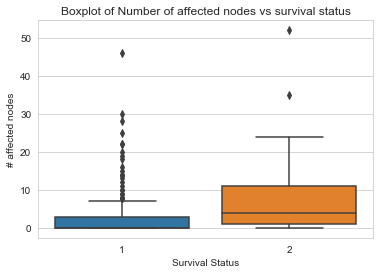

In [47]:
sbn.boxplot(x = "Survival Status", y = "# affected nodes", data = hb)
plt.title("Boxplot of Number of affected nodes vs survival status")
plt.show()
#plt.plot()
#sbn.boxplot(x = "Survival Status", y = "Year of Operation", data = hb)
#plt.plot()


1. As discussed at the time of median, 50th percentile or median is 52.00 this is indicated by center line in box.
2. From this plot we can conclude that Survival rate is high if the number of affected nodes are less than 3
3. This plot ensures that 25% patients has affected nodes 1 or 2 are survived. 
4. As the # affected nodes increases the survival rate decreases
5. More than 50% of patients with survival status 2 are classified as survial status 1


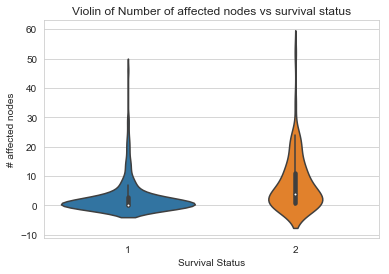

In [48]:
sbn.violinplot(x = "Survival Status", y = "# affected nodes", data = hb)
plt.title("Violin of Number of affected nodes vs survival status")
plt.show()


1. From the above box plot we cant make any conclusion as box plots are overlapping on Y axis 

1. Violin plots are combination of box plot and PDF. 
2. Again both plots are overlapping on Y-axix. However, if affected nodes are in range 0-3 the survival rate is high


# Conclusion
1. Scatter plot helps us to visualize whether we can apply some classification strategy based on the Survival Status
2. Unfortunately for given data set it is not possible to classify the whether patient survived or not based on features as scatter plot shows overlapping features.
3. Similar phenomenon observed while plotting pdf of all features to differentiate survival status. The pdfs are completely overlapping except for feature number of affected nodes. One can conclude from the pdf of affected nodes that probability of death increases as the Number of affected nodes in the patient increases
4. We have used some statistical parameters to understand the data set such as mean, std, mad etc.